<span style="color:green;float:right">Homepage: https://spkit.github.io</span>
<br><span style="color:green;float:right">Nikesh Bajaj : http://nikeshbajaj.in</span>

# Decision Trees with shrinking capability from SpKit

**Note**:In this notebook, we show the capability of decision tree from ***spkit*** to analysie the training and testing performace at each depth of a trained tree. After which, a trained tree can be shrink to any smaller depth, ***without retraining it***. So, by using Decision Tree from ***spkit***, you could choose a very high number for a **max_depth** (or just choose -1, for infinity) and analysis the parformance (accuracy, mse, loss) of training and testing (practically, a validation set) sets at each depth level. Once you decide which is the right depth, you could shrink your trained tree to that layer, without explicit training it again to with new depth parameter.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Classification----Diabetes-Dataset----binary-class" data-toc-modified-id="Classification----Diabetes-Dataset----binary-class-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classification  - Diabetes Dataset -  binary class</a></span><ul class="toc-item"><li><span><a href="#Train-with-max_depth-=15,-Accuracy,-Logloss" data-toc-modified-id="Train-with-max_depth-=15,-Accuracy,-Logloss-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Train with max_depth =15, Accuracy, Logloss</a></span></li><li><span><a href="#Plot-Trained-Tree" data-toc-modified-id="Plot-Trained-Tree-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot Trained Tree</a></span></li><li><span><a href="#Analysing-the-Learning-Curve-with-test-data-(validation-set)" data-toc-modified-id="Analysing-the-Learning-Curve-with-test-data-(validation-set)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Analysing the Learning Curve with test data (validation set)</a></span></li><li><span><a href="#Learning-curve-with-tree" data-toc-modified-id="Learning-curve-with-tree-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Learning curve with tree</a></span></li><li><span><a href="#Shrinking-the-trained-tree-to-depth=7" data-toc-modified-id="Shrinking-the-trained-tree-to-depth=7-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Shrinking the trained tree to depth=7</a></span></li><li><span><a href="#Plotting-final-tree" data-toc-modified-id="Plotting-final-tree-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Plotting final tree</a></span></li></ul></li><li><span><a href="#Regression---Diabetes-Dataset---score" data-toc-modified-id="Regression---Diabetes-Dataset---score-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regression - Diabetes Dataset - score</a></span><ul class="toc-item"><li><span><a href="#Train-with-max_depth=15,-MSE,-MAE" data-toc-modified-id="Train-with-max_depth=15,-MSE,-MAE-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Train with max_depth=15, MSE, MAE</a></span></li><li><span><a href="#Plot-trained-Tree" data-toc-modified-id="Plot-trained-Tree-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plot trained Tree</a></span></li><li><span><a href="#Analysing-the-Learning-Curve-and-Tree-with-MAE" data-toc-modified-id="Analysing-the-Learning-Curve-and-Tree-with-MAE-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Analysing the Learning Curve and Tree with MAE</a></span></li><li><span><a href="#Shrining-a-trained-Tree-to-depth=2" data-toc-modified-id="Shrining-a-trained-Tree-to-depth=2-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Shrining a trained Tree to depth=2</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import copy

In [2]:
np.random.seed(100) # just to ensure the reproducible results

In [3]:
import spkit
spkit.__version__

'0.0.9'

## Classification  - Diabetes Dataset -  binary class

In [4]:
from spkit.ml import ClassificationTree

In [5]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X = data.data
y = 1*(data.target>np.mean(data.target))

feature_names = data.feature_names
print(X.shape, y.shape)
Xt,Xs,yt,ys = train_test_split(X,y,test_size =0.3)
print(Xt.shape, Xs.shape,yt.shape, ys.shape)

(442, 10) (442,)
(309, 10) (133, 10) (309,) (133,)


### Train with max_depth =15, Accuracy, Logloss

In [6]:
clf = ClassificationTree(max_depth=15)
clf.fit(Xt,yt,feature_names=feature_names)
ytp = clf.predict(Xt)
ysp = clf.predict(Xs)

ytpr = clf.predict_proba(Xt)[:,1]
yspr = clf.predict_proba(Xs)[:,1]

print('Depth of trained Tree ', clf.getTreeDepth())
print('Accuracy')
print('- Training : ',np.mean(ytp==yt))
print('- Testing  : ',np.mean(ysp==ys))
print('Logloss')
Trloss = -np.mean(yt*np.log(ytpr+1e-10)+(1-yt)*np.log(1-ytpr+1e-10))
Tsloss = -np.mean(ys*np.log(yspr+1e-10)+(1-ys)*np.log(1-yspr+1e-10))
print('- Training : ',Trloss)
print('- Testing  : ',Tsloss)

Depth of trained Tree  12
Accuracy
- Training :  1.0
- Testing  :  0.7218045112781954
Logloss
- Training :  -1.0000000826903709e-10
- Testing  :  6.405687852618023


### Plot Trained Tree

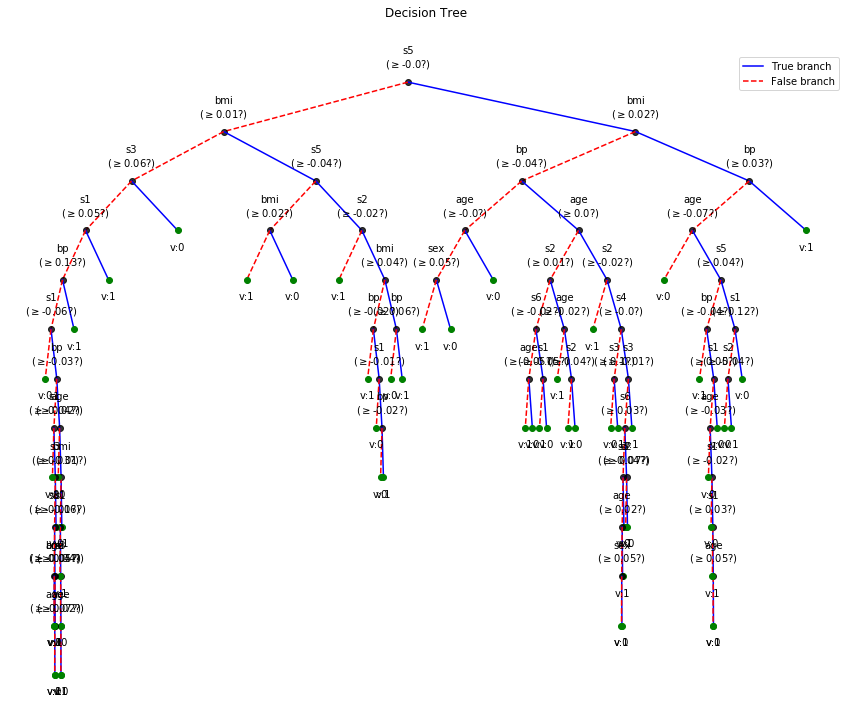

In [7]:
plt.figure(figsize=(15,12))
clf.plotTree()

### Analysing the Learning Curve with test data (validation set)

In [8]:
Lcurve = clf.getLcurve(Xt=Xt,yt=yt,Xs=Xs,ys=ys,measure='acc')
Lcurve

{'measure': 'acc',
 1: {'train': 0.7378640776699029, 'test': 0.7142857142857143},
 2: {'train': 0.7378640776699029, 'test': 0.7142857142857143},
 3: {'train': 0.7831715210355987, 'test': 0.7218045112781954},
 4: {'train': 0.8252427184466019, 'test': 0.6842105263157895},
 5: {'train': 0.8543689320388349, 'test': 0.7142857142857143},
 6: {'train': 0.8867313915857605, 'test': 0.706766917293233},
 7: {'train': 0.9158576051779935, 'test': 0.7518796992481203},
 8: {'train': 0.9385113268608414, 'test': 0.7518796992481203},
 9: {'train': 0.9676375404530745, 'test': 0.7218045112781954},
 10: {'train': 0.9838187702265372, 'test': 0.7218045112781954},
 11: {'train': 0.9935275080906149, 'test': 0.7218045112781954},
 12: {'train': 1.0, 'test': 0.7218045112781954}}

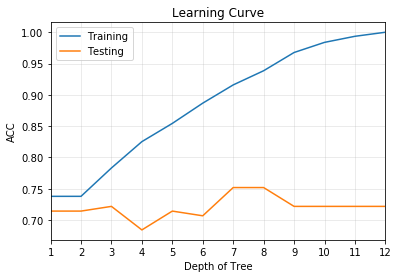

In [9]:
clf.plotLcurve()
plt.xlim([1,clf.getTreeDepth()])
plt.xticks(np.arange(1,clf.getTreeDepth()+1))
plt.show()

### Learning curve with tree

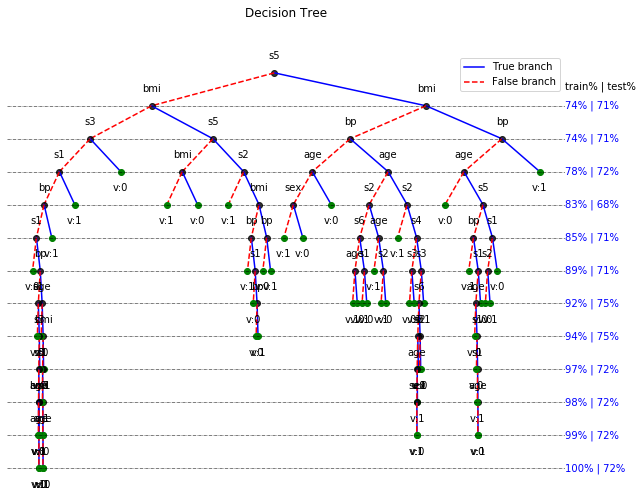

In [10]:
plt.figure(figsize=(10,8))
clf.plotTree(show=False,Measures=True,showNodevalues=True,showThreshold=False)

### Shrinking the trained tree to depth=7

In [11]:
clf.updateTree(shrink=True,max_depth=7)

In [12]:
ytp = clf.predict(Xt)
ysp = clf.predict(Xs)

ytpr = clf.predict_proba(Xt)[:,1]
yspr = clf.predict_proba(Xs)[:,1]

print('Depth of trained Tree ', clf.getTreeDepth())
print('Accuracy')
print('- Training : ',np.mean(ytp==yt))
print('- Testing  : ',np.mean(ysp==ys))
print('Logloss')
Trloss = -np.mean(yt*np.log(ytpr+1e-10)+(1-yt)*np.log(1-ytpr+1e-10))
Tsloss = -np.mean(ys*np.log(yspr+1e-10)+(1-ys)*np.log(1-yspr+1e-10))
print('- Training : ',Trloss)
print('- Testing  : ',Tsloss)

Depth of trained Tree  7
Accuracy
- Training :  0.9158576051779935
- Testing  :  0.7518796992481203
Logloss
- Training :  0.175708775711661
- Testing  :  4.172100873454743


### Plotting final tree

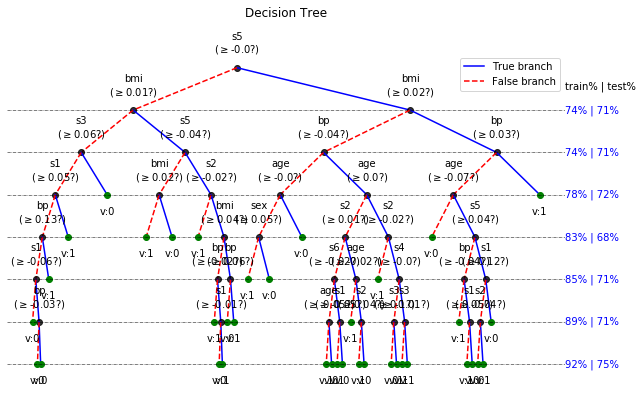

In [13]:
plt.figure(figsize=(10,6))
clf.plotTree(show=False,Measures=True,showNodevalues=True,showThreshold=True)

## Regression - Diabetes Dataset - score

In [14]:
from spkit.ml import RegressionTree

In [15]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X = data.data
y = data.target

feature_names = data.feature_names
print(X.shape, y.shape)
Xt,Xs,yt,ys = train_test_split(X,y,test_size =0.3)
print(Xt.shape, Xs.shape,yt.shape, ys.shape)

(442, 10) (442,)
(309, 10) (133, 10) (309,) (133,)


### Train with max_depth=15, MSE, MAE

In [16]:
rgs = RegressionTree(max_depth=15)
rgs.fit(Xt,yt,feature_names=feature_names)
ytp = rgs.predict(Xt)
ysp = rgs.predict(Xs)
print('Depth of trained Tree ', rgs.getTreeDepth())
print('MSE')
print('- Training : ',np.mean((ytp-yt)**2))
print('- Testing  : ',np.mean((ysp-ys)**2))
print('MAE')
print('- Training : ',np.mean(np.abs(ytp-yt)))
print('- Testing  : ',np.mean(np.abs(ysp-ys)))

Depth of trained Tree  15
MSE
- Training :  0.0
- Testing  :  6644.248120300752
MAE
- Training :  0.0
- Testing  :  64.203007518797


### Plot trained Tree

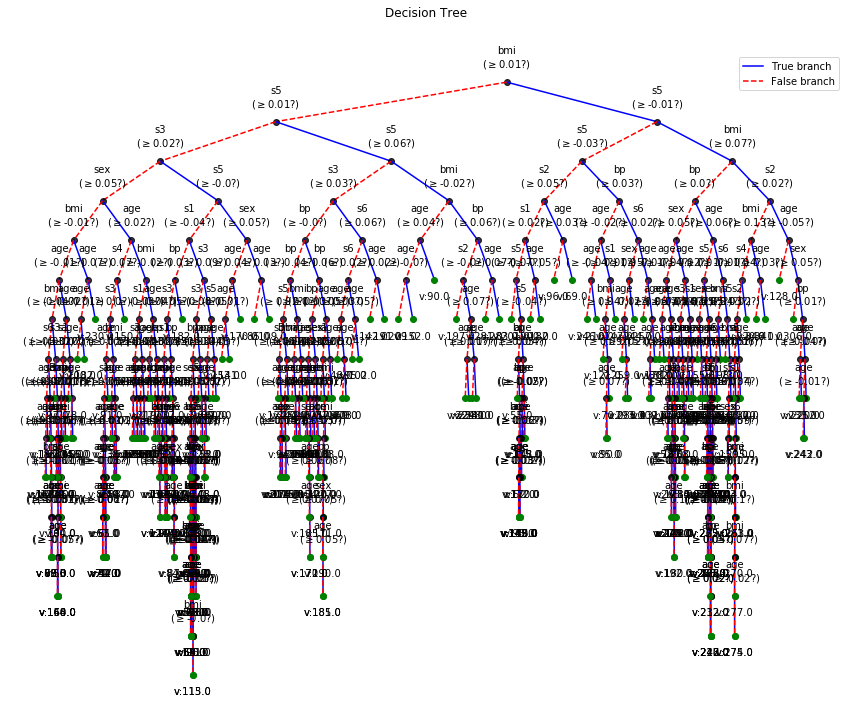

In [17]:
plt.figure(figsize=(15,12))
rgs.plotTree()

### Analysing the Learning Curve and Tree with MAE

In [18]:
Lcurve = rgs.getLcurve(Xt=Xt,yt=yt,Xs=Xs,ys=ys,measure='mae')
Lcurve

{'measure': 'mae',
 1: {'train': 55.64778738315172, 'test': 51.716919962745465},
 2: {'train': 48.362689652870486, 'test': 44.65021200086095},
 3: {'train': 44.6979550529244, 'test': 45.49887634992147},
 4: {'train': 38.526500592269464, 'test': 46.66850486775299},
 5: {'train': 31.654223739118084, 'test': 53.99716202270382},
 6: {'train': 24.435889598834578, 'test': 58.34396488014909},
 7: {'train': 17.002407337358793, 'test': 62.19785122980612},
 8: {'train': 10.516119586993373, 'test': 60.8061313999284},
 9: {'train': 5.282550674783685, 'test': 61.843482832956525},
 10: {'train': 2.855201109570041, 'test': 62.96679197994988},
 11: {'train': 1.3185904350952895, 'test': 64.48496240601504},
 12: {'train': 0.44854368932038824, 'test': 64.33208020050125},
 13: {'train': 0.08683926645091694, 'test': 64.24185463659148},
 14: {'train': 0.006472491909385114, 'test': 64.203007518797},
 15: {'train': 0.0, 'test': 64.203007518797}}

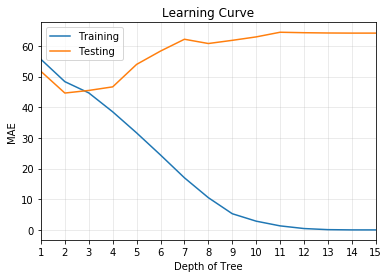

In [19]:
rgs.plotLcurve()
plt.xlim([1,rgs.getTreeDepth()])
plt.xticks(np.arange(1,rgs.getTreeDepth()+1))
plt.show()

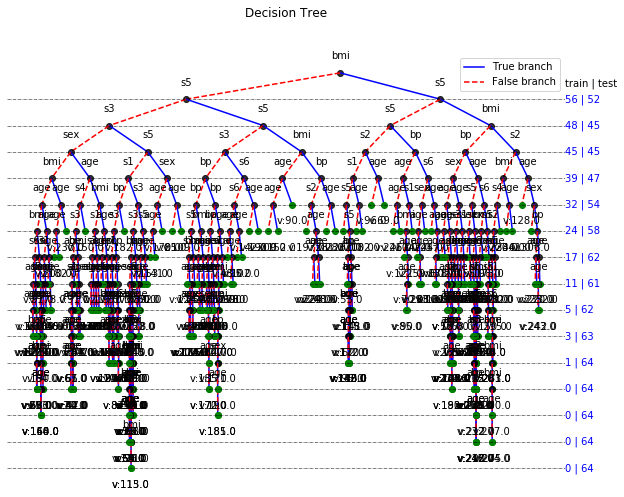

In [20]:
plt.figure(figsize=(10,8))
rgs.plotTree(show=False,Measures=True,showNodevalues=True,showThreshold=False)

### Shrining a trained Tree to depth=2

In [21]:
rgs.updateTree(shrink=True,max_depth=2)

In [22]:
ytp = rgs.predict(Xt)
ysp = rgs.predict(Xs)
print('Depth of trained Tree ', rgs.getTreeDepth())
print('MSE')
print('- Training : ',np.mean((ytp-yt)**2))
print('- Testing  : ',np.mean((ysp-ys)**2))
print('MAE')
print('- Training : ',np.mean(np.abs(ytp-yt)))
print('- Testing  : ',np.mean(np.abs(ysp-ys)))

Depth of trained Tree  2
MSE
- Training :  3424.44536654361
- Testing  :  3447.1129936444713
MAE
- Training :  48.362689652870486
- Testing  :  44.65021200086095


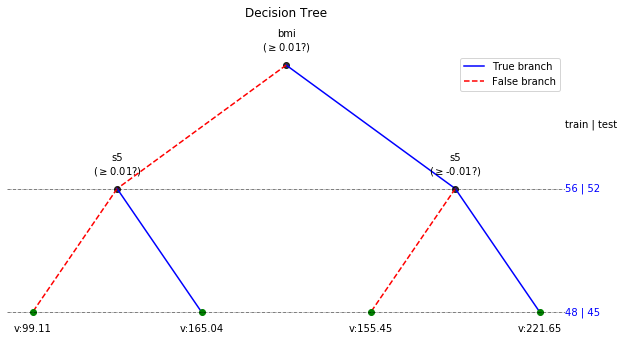

In [23]:
plt.figure(figsize=(10,5))
rgs.plotTree(show=False,Measures=True,showNodevalues=True,showThreshold=True)